In [1]:
import sys
sys.path.append('../../')

from PIL import Image
import torch
import pandas as pd
from model_runner import ModelRunner
from SRCNN import SRCNN
from image_helper import ImageHelper

In [2]:
DATASET_ROOT="../../datasets/"
DATASET_NAME = "Set5"
FULL_DATASET_PATH = f"{DATASET_ROOT}{DATASET_NAME}"
model_runner = ModelRunner()
image_helper = ImageHelper()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_f2_1 = SRCNN(f2=1).to(device)
model_f2_1_unfiltered = SRCNN(f2=1).to(device)
model_f2_lr_fixed = SRCNN(f2=1).to(device)

model_f2_5 = SRCNN(f2=5).to(device)
model_f2_5_unfiltered = SRCNN(f2=5).to(device)


In [4]:
# Load models
try:
    model_f2_1.load_state_dict(torch.load('./trained_models/model_f2_1.pth'))
    model_f2_1_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_1_unfiltered.pth'))
    model_f2_lr_fixed.load_state_dict(torch.load('./trained_models/model_f2_1_lr_fixed_1e-3.pth'))
    model_f2_5.load_state_dict(torch.load('./trained_models/model_f2_5.pth')) 
    model_f2_5_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_5_unfiltered.pth'))

except:
    model_f2_1.load_state_dict(torch.load('./trained_models/model_f2_1.pth', map_location=torch.device('cpu')))
    model_f2_1_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_1_unfiltered.pth', map_location=torch.device('cpu')))
    model_f2_lr_fixed.load_state_dict(torch.load('./trained_models/model_f2_1_lr_fixed_1e-3.pth', map_location=torch.device('cpu')))
    model_f2_5.load_state_dict(torch.load('./trained_models/model_f2_5.pth', map_location=torch.device('cpu')))
    model_f2_5_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_5_unfiltered.pth', map_location=torch.device('cpu')))
    

In [5]:
# Load dataframes
model_f2_1_df = pd.read_csv('./dataframes/model_f2_1.csv')
model_f2_1_unfiltered_df = pd.read_csv('./dataframes/model_f2_1_unfiltered.csv')
model_f2_lr_fixed_df = pd.read_csv('./dataframes/model_f2_1_lr_fixed_1e-3.csv')
model_f2_5_df = pd.read_csv('./dataframes/model_f2_5.csv')
model_f2_5_unfiltered_df = pd.read_csv('./dataframes/model_f2_5_unfiltered.csv')


## **Comparando o treinamento**

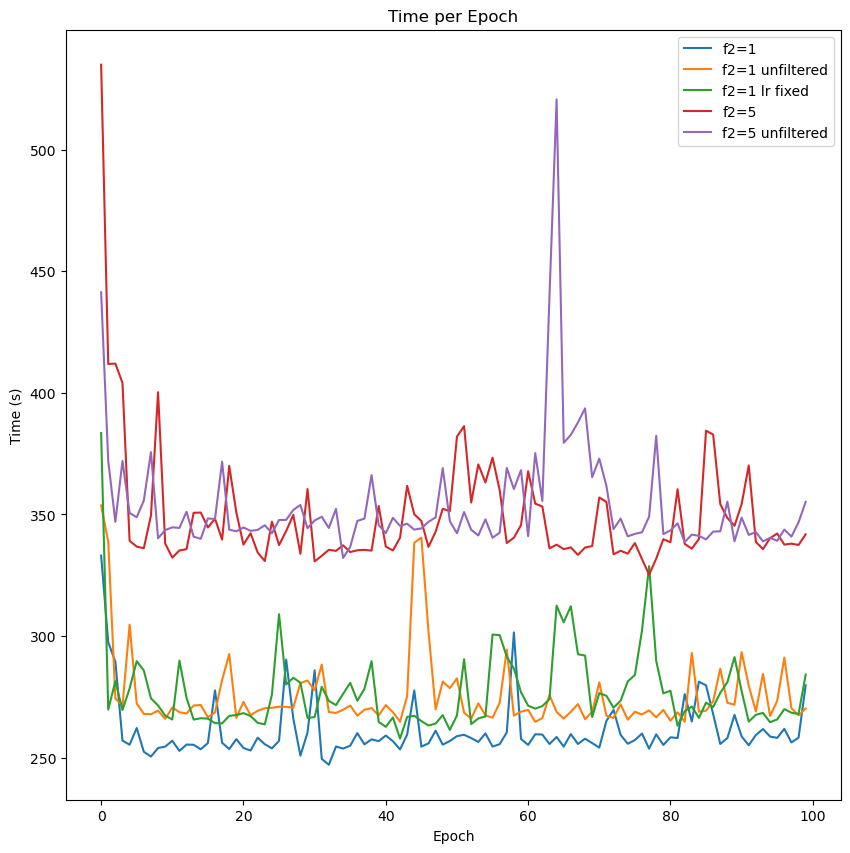

In [9]:
model_runner.plot_time_per_epoch_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)


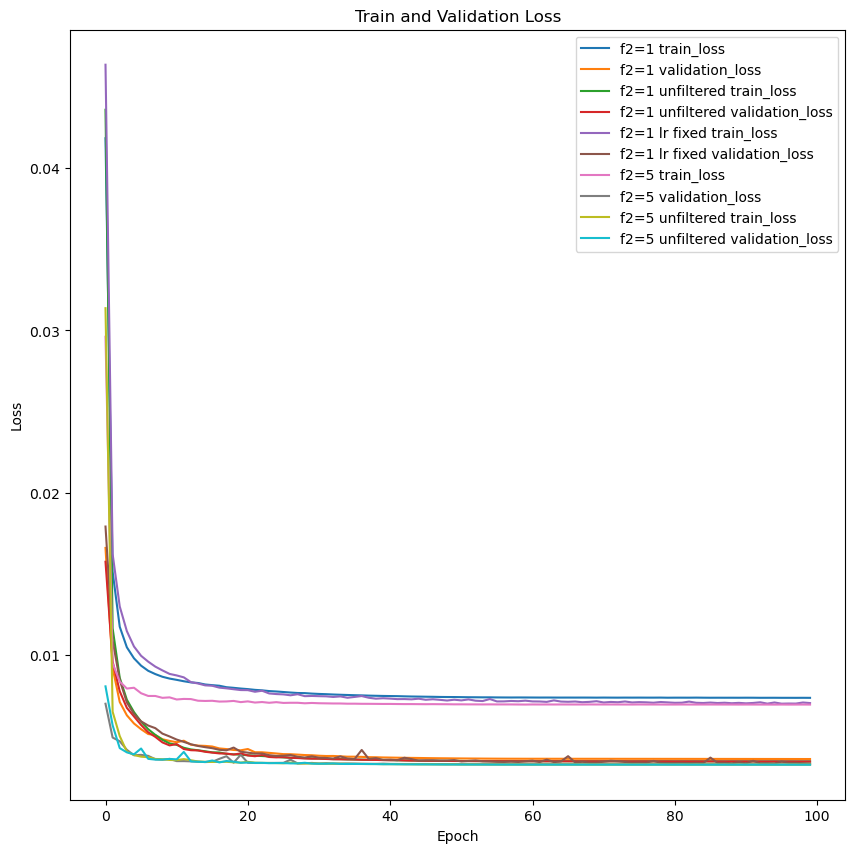

In [13]:
model_runner.plot_train_validation_loss_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
    False
)

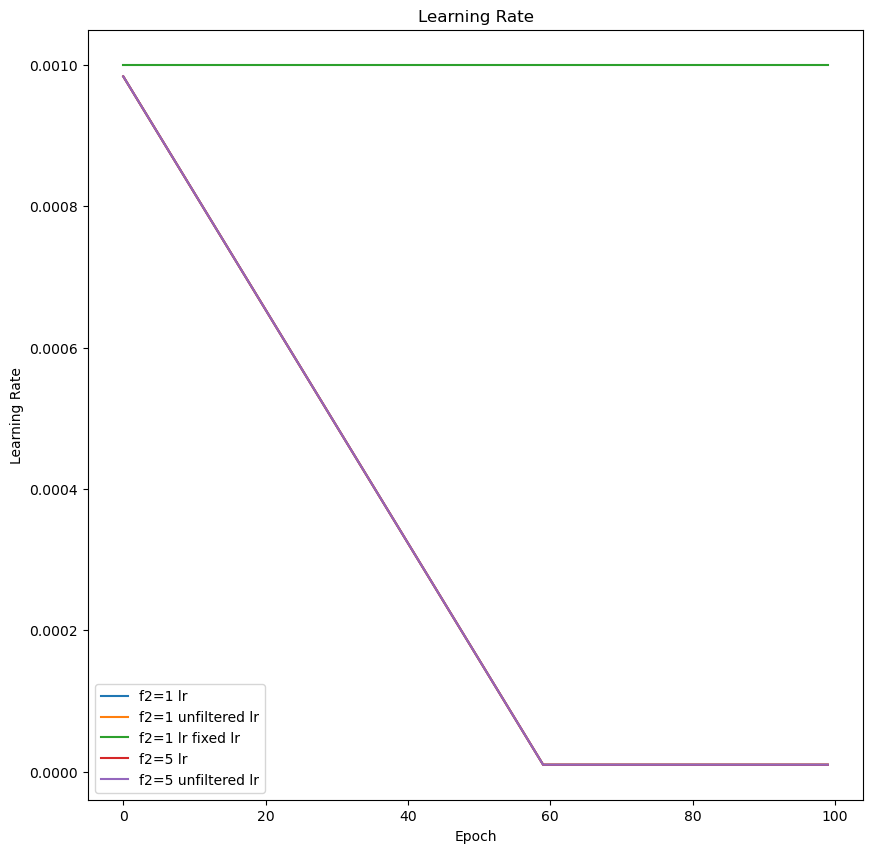

In [14]:
model_runner.plot_lr_comparison(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)

#### - F2 maior -> maior tempo de processamento

## **Comparando os resultados**

In [15]:
model_runner.compare_models(
    [
        {
            "name": "f2=1",
            "model": model_f2_1,
        },
        {
            "name": "f2=1 unfiltered",
            "model": model_f2_1_unfiltered,
        },
        {
            "name": "f2=1 lr fixed",
            "model": model_f2_lr_fixed,
        },
        {
            "name": "f2=5",
            "model": model_f2_5,
        },
        {
            "name": "f2=5 unfiltered",
            "model": model_f2_5_unfiltered,
        },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
14it [00:17,  1.27s/it]
14it [00:16,  1.18s/it]
14it [00:17,  1.22s/it]
14it [00:19,  1.40s/it]
14it [00:18,  1.36s/it]


,f2=1,f2=1 unfiltered,f2=1 lr fixed,f2=5,f2=5 unfiltered
PSNR,24.557707,24.604319,24.804457,24.815763,24.759735
Bicubic PSNR,24.496826,24.496826,24.496826,24.496826,24.496826
SSIM,0.714441,0.717399,0.724465,0.726433,0.724994
Bicubic SSIM,0.731671,0.731671,0.731671,0.731671,0.731671


Podemos observar que o os dados filtrados fizeram uma diferenca no caso em que f2=5 **[Vai ser mostrado quando eu ajeitar os pesos do f2_5]**

/home/pedrovelozo/TCC-Pedro-Velozo-ENG1132/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the val

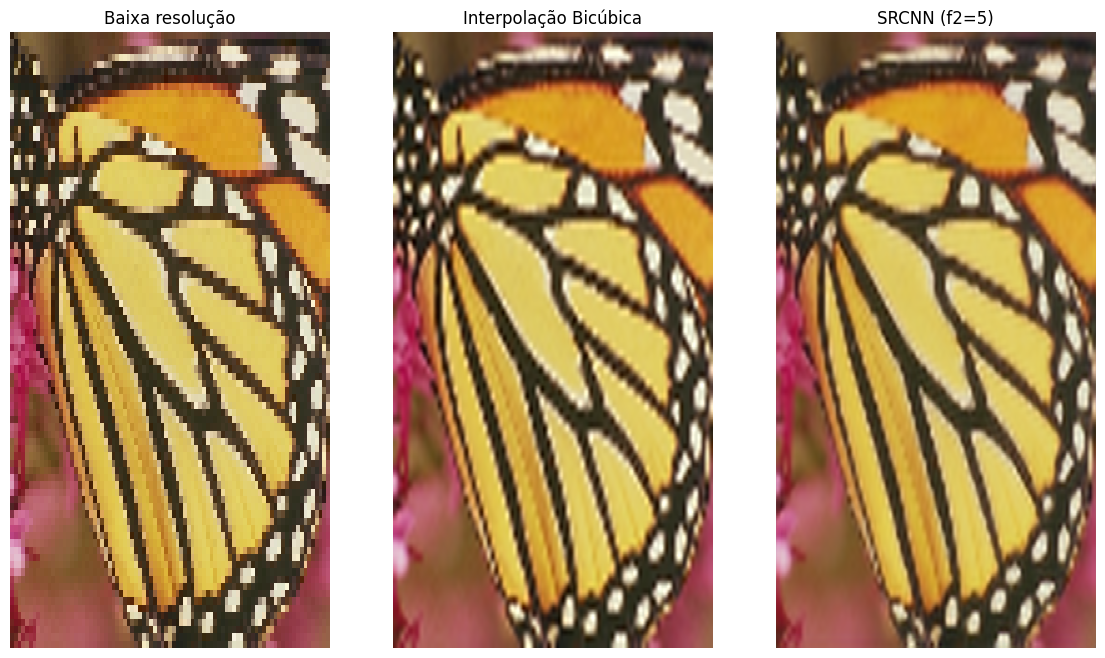

In [6]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/butterfly.png"
# IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/baby.png"

image_helper.show_tensor_as_images_side_by_side(
   [
        {
            "label": "Baixa resolução",
            "tensor": image_helper.downsample_image_as_tensor(
                IMAGE_EXAMPLE, 3, interpolation=Image.BICUBIC,
            ),
        },
            {
                "label": "Interpolação Bicúbica",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    IMAGE_EXAMPLE, 3
                ),
            },
            {
                "label": "SRCNN (f2=5)",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    IMAGE_EXAMPLE,
                    3
                )
            },
   ],
   show_grid=False
)